In [1]:
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip install xgboost
!pip install statsmodels
!pip install shap


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import statsmodels.api as sm
import statsmodels.formula.api as smf
import shap
from scipy.stats import pointbiserialr
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier


C:\Users\sansk\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Importing data set using Pandas
import pandas as pd
csv_path = r"C:\Users\sansk\Downloads\Bank_Personal_Loan_Modelling(1).csv"

df = pd.read_csv(csv_path)
print(df.head(5))

   ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [4]:
df.head(5)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [5]:
# We can see that the dimension of the dataframe
# We have 5000 sample data from a Bank. Containing 14 column (Variables)
df.shape


(5000, 14)

In [6]:
'''About this file
ID: customer Id (continuous variable)

Age:customer's age in completed years (Categorical Variable: 0-10, 10-20, ..., 60-70) 

Experience:years of professional experience (Continuous)

Income:Annual income of the customer in thousands (Continious)

ZIP Code:Address Zip code (Continuous)

Family:family size of customer (Catagorical: 1,2,3 or 4)

CCAvg:Avg. spending on credit card per month
due to all other parameter is annually so i converted it for per year and it was on Fraction so I converted into continuous float variable

Education :Educational level ( undergraduate= 1 , graduate=2 , advance=3)

Education :Educational level ( undergraduate= 1 , graduate=2 , advance=3)

Personal Loan: Did this customer accept the personal loan offered in the last campaign? (Categorical: 0 is No, 1 is yes)

Securities Account:Does the customer have a securities account with the bank? (Categorical: 0 is No, 1 is yes)

CD Account:Does the customer have a certificate of deposit(CD) account with the bank? (Categorical: 0 is No, 1 is yes)

Online:Does the customer use internet banking facilities (Categorical: 0 is No, 1 is yes)

CreditCard: Does the customer use a credit card issued by universalBank? (Categorical: 0 is No, 1 is yes)'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [7]:
#Since the data column "CCAvg" is in the form of object, we can see that this is a catagorical variable
df['CCAvg'].describe()

count     5000
unique     108
top       0/30
freq       241
Name: CCAvg, dtype: object

In [8]:
#Check the statistical dimentions of the data set
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
miss_data = df.isnull()

In [10]:
miss_data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Checking for any missing values
for column in miss_data.columns.values.tolist():
    print(column)
    print(miss_data[column].value_counts())
    print(" ")

ID
ID
False    5000
Name: count, dtype: int64
 
Age
Age
False    5000
Name: count, dtype: int64
 
Experience
Experience
False    5000
Name: count, dtype: int64
 
Income
Income
False    5000
Name: count, dtype: int64
 
ZIP Code
ZIP Code
False    5000
Name: count, dtype: int64
 
Family
Family
False    5000
Name: count, dtype: int64
 
CCAvg
CCAvg
False    5000
Name: count, dtype: int64
 
Education
Education
False    5000
Name: count, dtype: int64
 
Mortgage
Mortgage
False    5000
Name: count, dtype: int64
 
Personal Loan
Personal Loan
False    5000
Name: count, dtype: int64
 
Securities Account
Securities Account
False    5000
Name: count, dtype: int64
 
CD Account
CD Account
False    5000
Name: count, dtype: int64
 
Online
Online
False    5000
Name: count, dtype: int64
 
CreditCard
CreditCard
False    5000
Name: count, dtype: int64
 


In [12]:
def convert_ccavg(x):
    try:
        # Handle missing values (NaN, None)
        if pd.isna(x):
            return None
        
        x = str(x).strip()  # Convert to string and remove whitespace
        
        # Split and convert fractions
        if '/' in x:
            parts = x.split('/')
            if len(parts) == 2:  # Ensure format is "num/den"
                # Check if denominator is zero
                if float(parts[1]) == 0:
                    return float(parts[0])  # Return numerator as float (e.g., "1/0" → 1.0)
                else:
                    num, den = float(parts[0]), float(parts[1])
                    return num / den  # Normal division
            else:
                return None  # Invalid format like "1/2/3"
        else:
            return float(x)  # Direct conversion for non-fractions
    except (ValueError, TypeError):
        return None  # Handle invalid strings (e.g., "N/A", "High")

# Apply the function
df['CCAvg_float'] = df['CCAvg'].apply(convert_ccavg)

# Check results
print(df[['CCAvg', 'CCAvg_float']].head())

  CCAvg  CCAvg_float
0  1/60     0.016667
1  1/50     0.020000
2  1/00     1.000000
3  2/70     0.028571
4  1/00     1.000000


In [13]:
df['CCAvg_float'].describe()

count    5000.000000
mean        0.315289
std         0.982846
min         0.000000
25%         0.000000
50%         0.025000
75%         0.100000
max        10.000000
Name: CCAvg_float, dtype: float64

In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   object 
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  CCAvg_float         5000 non-null   float64
dtypes: float64(1), int64(13), object(1)
memory usage: 586.1

In [15]:
#Excluding the 'CCAvg' column
df2 = df.drop(columns=['CCAvg'])


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  CCAvg_float         5000 non-null   float64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [17]:
# Including only necessary potential predictors 
df2= df2.drop(columns = ['ID','ZIP Code'])

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  CCAvg_float         5000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [19]:
#Change Age into a categorical variable

# Define the bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70] 
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

# Create the age groups
df2['Age_Group'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=True)

# Verify
df2= df2.drop(columns = ['Age'])
print(df2[['Age_Group']].head())

  Age_Group
0     20-30
1     40-50
2     30-40
3     30-40
4     30-40


In [20]:
#Change Family into a categorical variable

# Convert to categorical with string labels
df2['Family'] = df2['Family'].astype('category')

# Verify
print(df2['Family'].dtype)  # Should show 'category'
print(df2['Family'].cat.categories)  # Shows [1, 2, 3, 4]

category
Index([1, 2, 3, 4], dtype='int64')


In [21]:
df2.describe()

,Experience,Income,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg_float
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,20.104600,73.774200,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.315289
std,11.467954,46.033729,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.982846
min,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,39.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,20.000000,64.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.025000
75%,30.000000,98.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.100000
max,43.000000,224.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,10.000000


In [22]:
df2.rename(columns={"Income":"Income in thousand", "Morgage":"Morgage in thousands"})

,Experience,Income in thousand,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg_float,Age_Group
0,1,49,4,1,0,0,1,0,0,0,0.016667,20-30
1,19,34,3,1,0,0,1,0,0,0,0.020000,40-50
2,15,11,1,1,0,0,0,0,0,0,1.000000,30-40
3,9,100,1,2,0,0,0,0,0,0,0.028571,30-40
4,8,45,4,2,0,0,0,0,0,1,1.000000,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,40,1,3,0,0,0,0,1,0,0.011111,20-30
4996,4,15,4,1,85,0,0,0,1,0,0.000000,20-30
4997,39,24,2,3,0,0,0,0,0,0,0.000000,60-70
4998,40,49,3,2,0,0,0,0,1,0,0.000000,60-70


In [23]:
#Change Education into a categorical variable

# Convert to categorical with string labels
df2['Education'] = df2['Education'].astype('category')

# Verify
print(df2['Education'].dtype)  # Should show 'category'
print(df2['Education'].cat.categories)  

# Educational level ( undergraduate= 1 , graduate=2 , advance=3)

category
Index([1, 2, 3], dtype='int64')


In [24]:
#Change Personal loan into a categorical variable

# Convert to categorical with string labels
df2['Personal Loan'] = df2['Personal Loan'].astype('category')

# Verify
print(df2['Personal Loan'].dtype)  # Should show 'category'
print(df2['Personal Loan'].cat.categories)  

# 0 = No; 1 = Yes

category
Index([0, 1], dtype='int64')


In [25]:
#Change Securities Account into a categorical variable

# Convert to categorical with string labels
df2['Securities Account'] = df2['Securities Account'].astype('category')

# Verify
print(df2['Securities Account'].dtype)  # Should show 'category'
print(df2['Securities Account'].cat.categories)  

# 0 = No; 1 = Yes

category
Index([0, 1], dtype='int64')


In [26]:
#Change CD Account into a categorical variable

# Convert to categorical with string labels
df2['CD Account'] = df2['CD Account'].astype('category')

# Verify
print(df2['CD Account'].dtype)  # Should show 'category'
print(df2['CD Account'].cat.categories)  

# 0 = No; 1 = Yes

category
Index([0, 1], dtype='int64')


In [27]:
#Change Online into a categorical variable

# Convert to categorical with string labels
df2['Online'] = df2['Online'].astype('category')

# Verify
print(df2['Online'].dtype)  # Should show 'category'
print(df2['Online'].cat.categories)  

# 0 = No; 1 = Yes

category
Index([0, 1], dtype='int64')


In [28]:
#Change CreditCard into a categorical variable

# Convert to categorical with string labels
df2['CreditCard'] = df2['CreditCard'].astype('category')

# Verify
print(df2['CreditCard'].dtype)  # Should show 'category'
print(df2['CreditCard'].cat.categories)  

# 0 = No; 1 = Yes

category
Index([0, 1], dtype='int64')


In [29]:
df2.describe(include= 'all')

,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg_float,Age_Group
count,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.000000,5000
unique,NaN,NaN,4.0,3.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,5
top,NaN,NaN,1.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,50-60
freq,NaN,NaN,1472.0,2096.0,NaN,4520.0,4478.0,4698.0,2984.0,3530.0,NaN,1323
mean,20.104600,73.774200,NaN,NaN,56.498800,NaN,NaN,NaN,NaN,NaN,0.315289,NaN
std,11.467954,46.033729,NaN,NaN,101.713802,NaN,NaN,NaN,NaN,NaN,0.982846,NaN
min,-3.000000,8.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,10.000000,39.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,20.000000,64.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.025000,NaN
75%,30.000000,98.000000,NaN,NaN,101.000000,NaN,NaN,NaN,NaN,NaN,0.100000,NaN


In [30]:
df2.describe()

,Experience,Income,Mortgage,CCAvg_float
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,20.104600,73.774200,56.498800,0.315289
std,11.467954,46.033729,101.713802,0.982846
min,-3.000000,8.000000,0.000000,0.000000
25%,10.000000,39.000000,0.000000,0.000000
50%,20.000000,64.000000,0.000000,0.025000
75%,30.000000,98.000000,101.000000,0.100000
max,43.000000,224.000000,635.000000,10.000000


In [31]:
#Differentiating categorical values and continuous values
cat_cols=df2.select_dtypes(include=['category']).columns
num_cols = df2.select_dtypes(include=np.number).columns.tolist()

Experience
Skew : -0.03


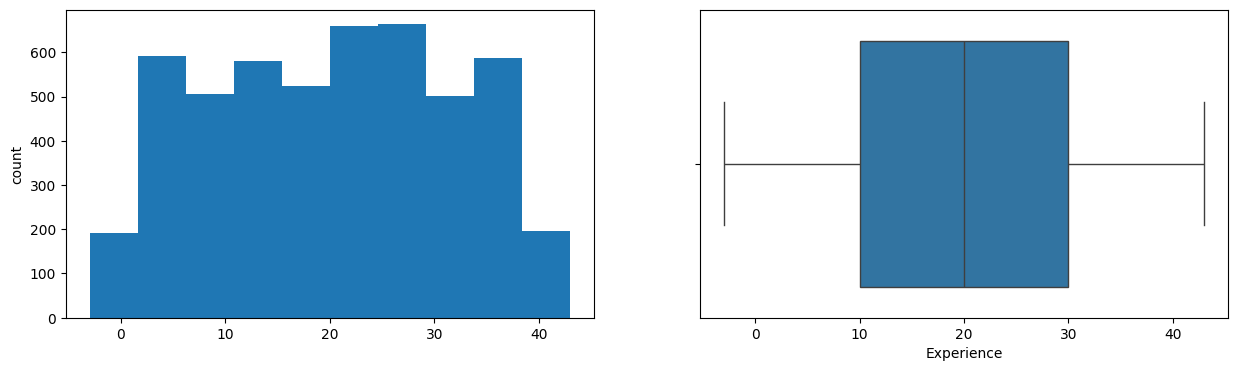

Income
Skew : 0.84


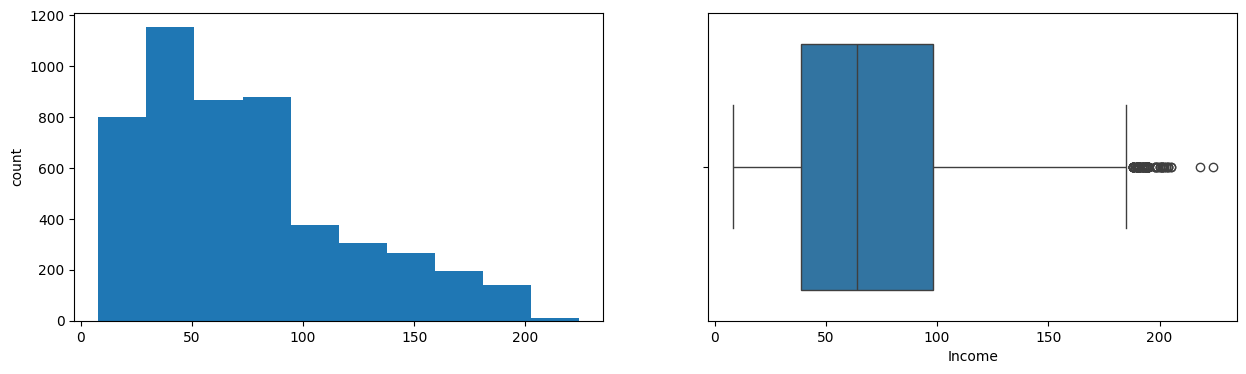

Mortgage
Skew : 2.1


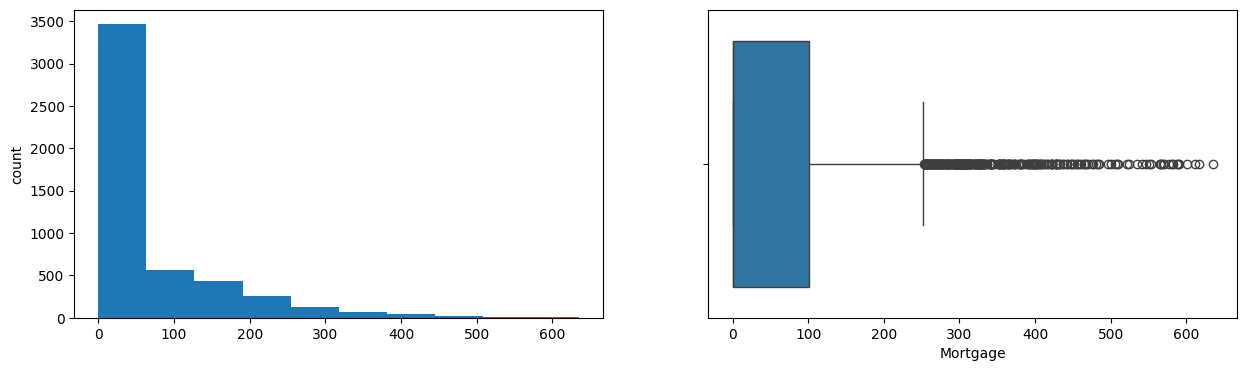

CCAvg_float
Skew : 5.02


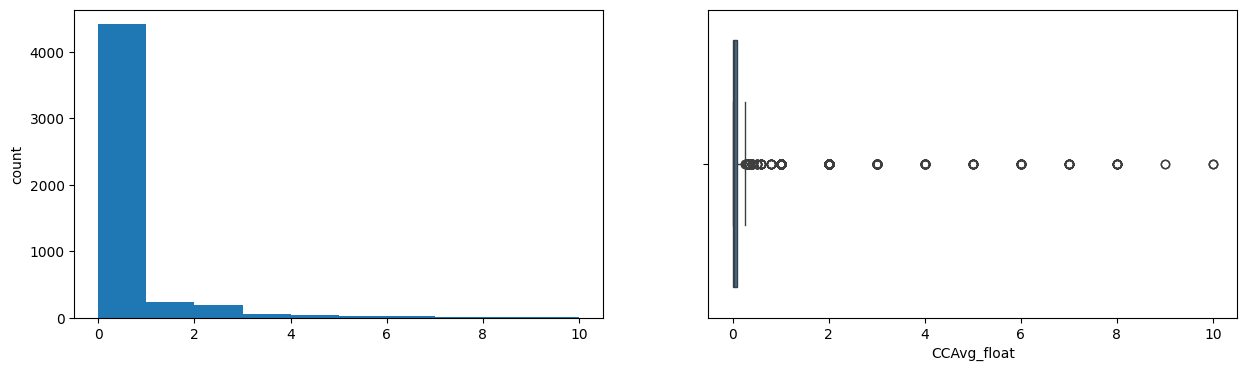

In [32]:
# Plotting continuous variables
for col in num_cols:
    print(col)
    print('Skew :', round(df2[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df2[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df2[col])
    plt.show()

In [33]:
df2.astype('category').describe()

,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg_float,Age_Group
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000.0,5000
unique,47,162,4,3,347,2,2,2,2,2,73.0,5
top,32,44,1,1,0,0,0,0,1,0,0.0,50-60
freq,154,85,1472,2096,3462,4520,4478,4698,2984,3530,1683.0,1323


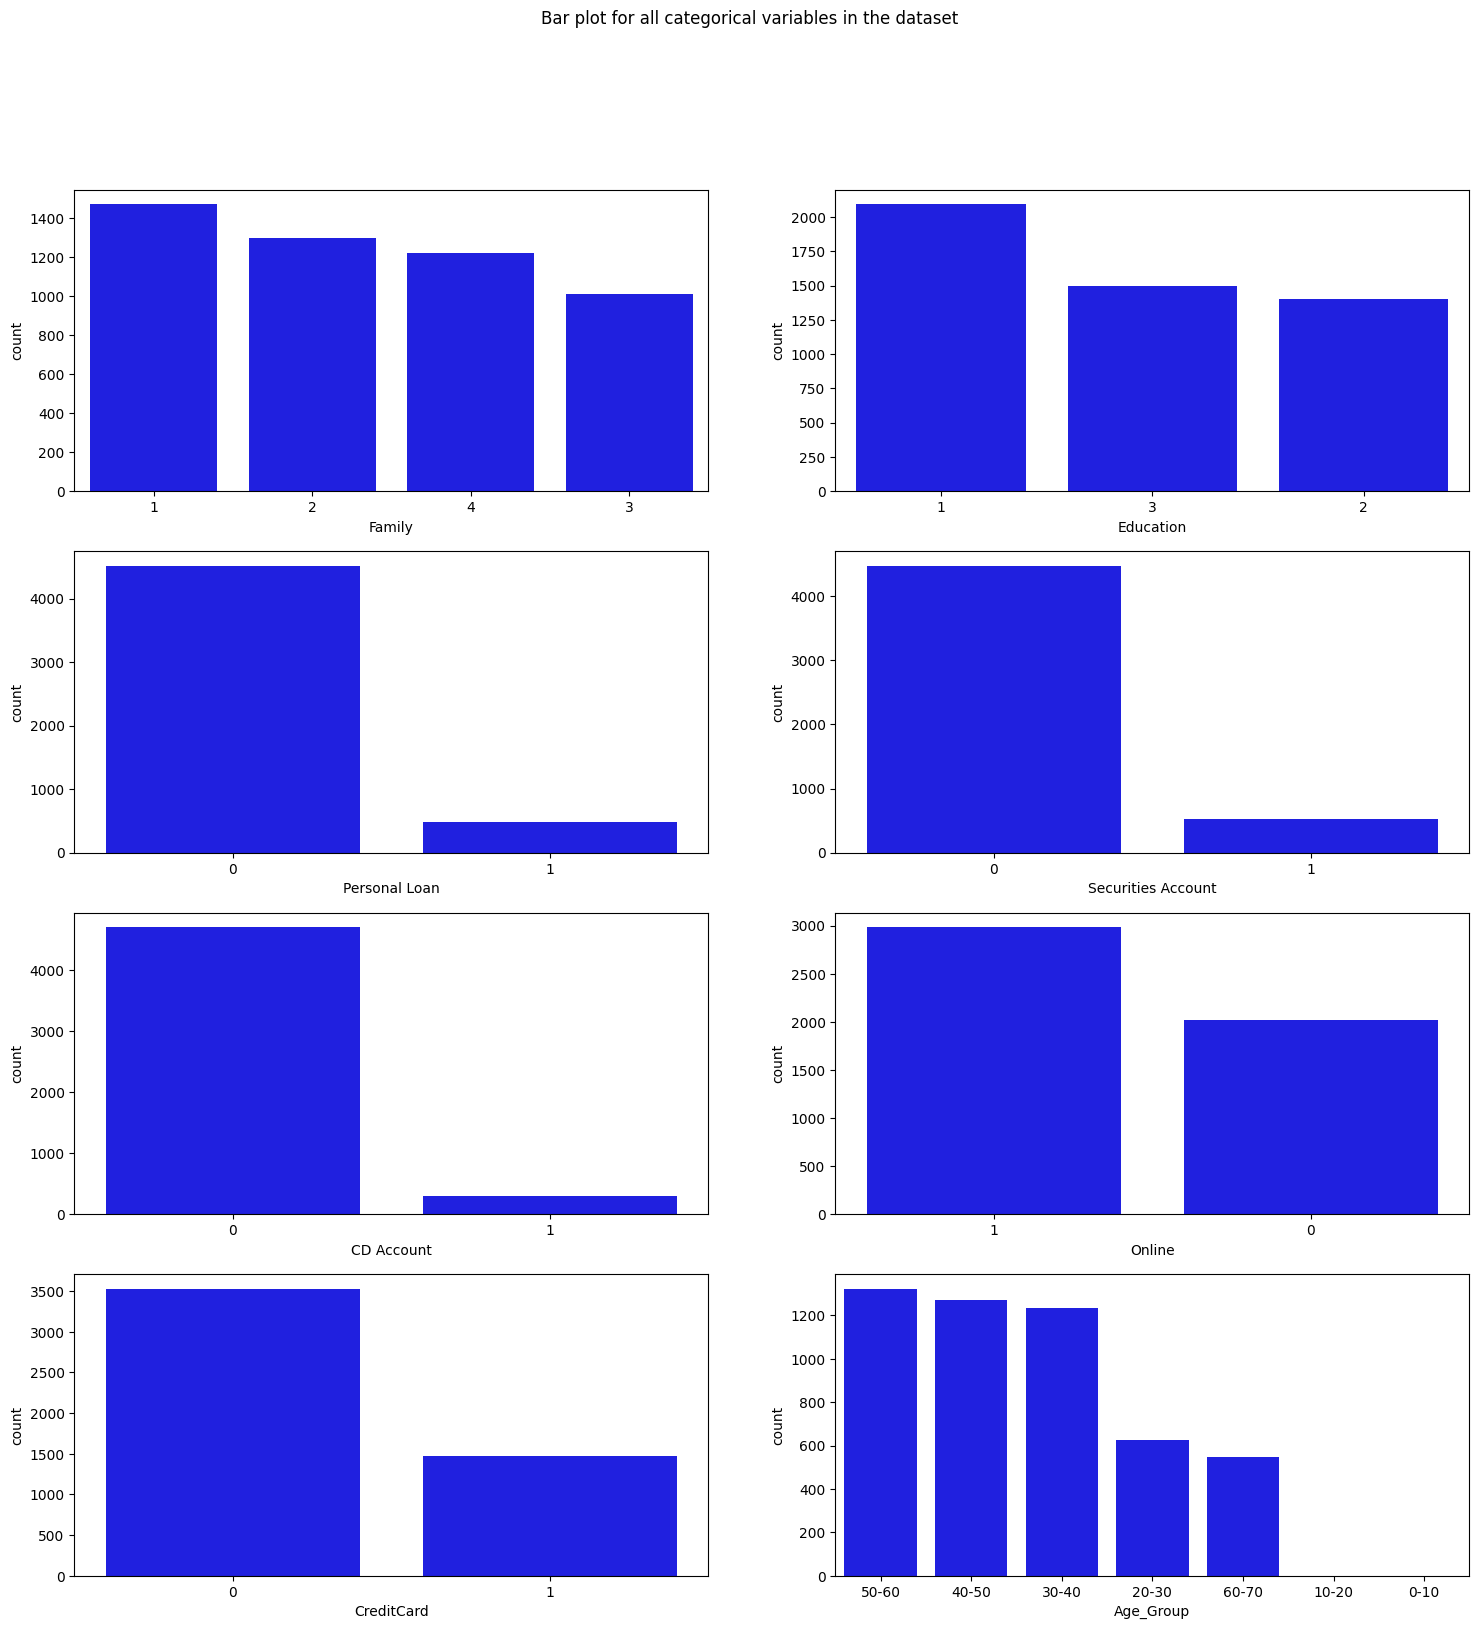

In [34]:
# Plotting Categorical variables
fig, axes = plt.subplots(4, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Family', data = df2, color = 'blue', 
              order = df2['Family'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Education', data = df2, color = 'blue', 
              order = df2['Education'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Personal Loan', data = df2, color = 'blue', 
              order = df2['Personal Loan'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Securities Account', data = df2, color = 'blue', 
              order = df2['Securities Account'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'CD Account', data = df2, color = 'blue', 
              order = df2['CD Account'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Online', data = df2, color = 'blue', 
              order = df2['Online'].value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'CreditCard', data = df2, color = 'blue', 
              order = df2['CreditCard'].value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'Age_Group', data = df2, color = 'blue', 
              order = df2['Age_Group'].value_counts().index);



In [35]:
# Detecting multi collinarity

In [36]:
# Correlation analysis

df2_con = df2[['Income','Experience','Mortgage','CCAvg_float']]
corr_matrix = df2_con.corr()
print(corr_matrix)

               Income  Experience  Mortgage  CCAvg_float
Income       1.000000   -0.046574  0.206806     0.205442
Experience  -0.046574    1.000000 -0.010582    -0.063450
Mortgage     0.206806   -0.010582  1.000000     0.019571
CCAvg_float  0.205442   -0.063450  0.019571     1.000000


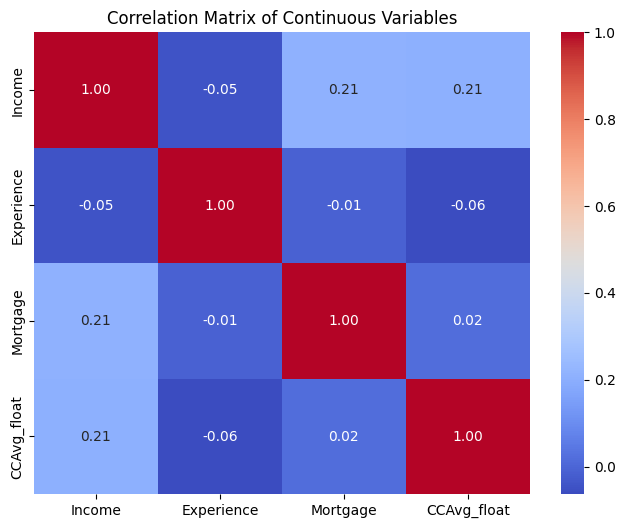

In [37]:
# Correlation univariant analysis Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Continuous Variables")
plt.show()

In [38]:
# Continuous Univariant Variables and their relation with 'Pesonal Loan'

pb_results = []

for column in df2_con:
    corr, pval = pointbiserialr(df2_con[column], df2['Personal Loan'])
    pb_results.append((column, corr, pval))

pb_df = pd.DataFrame(pb_results, columns = ['Variable', 'PointBiserial Correlation', 'p-value'])
print(pb_df)

      Variable  PointBiserial Correlation        p-value
0       Income                   0.502462  3.560286e-318
1   Experience                  -0.007413   6.002359e-01
2     Mortgage                   0.142095   5.730342e-24
3  CCAvg_float                   0.131413   1.053891e-20


In [39]:
# We can see that Income has higher correlation with Personal loan 
# With lower than 0.05 P-value which means, highly significant

""" This means that people with Higher income are more likely to accept personal loans """

' This means that people with Higher income are more likely to accept personal loans '

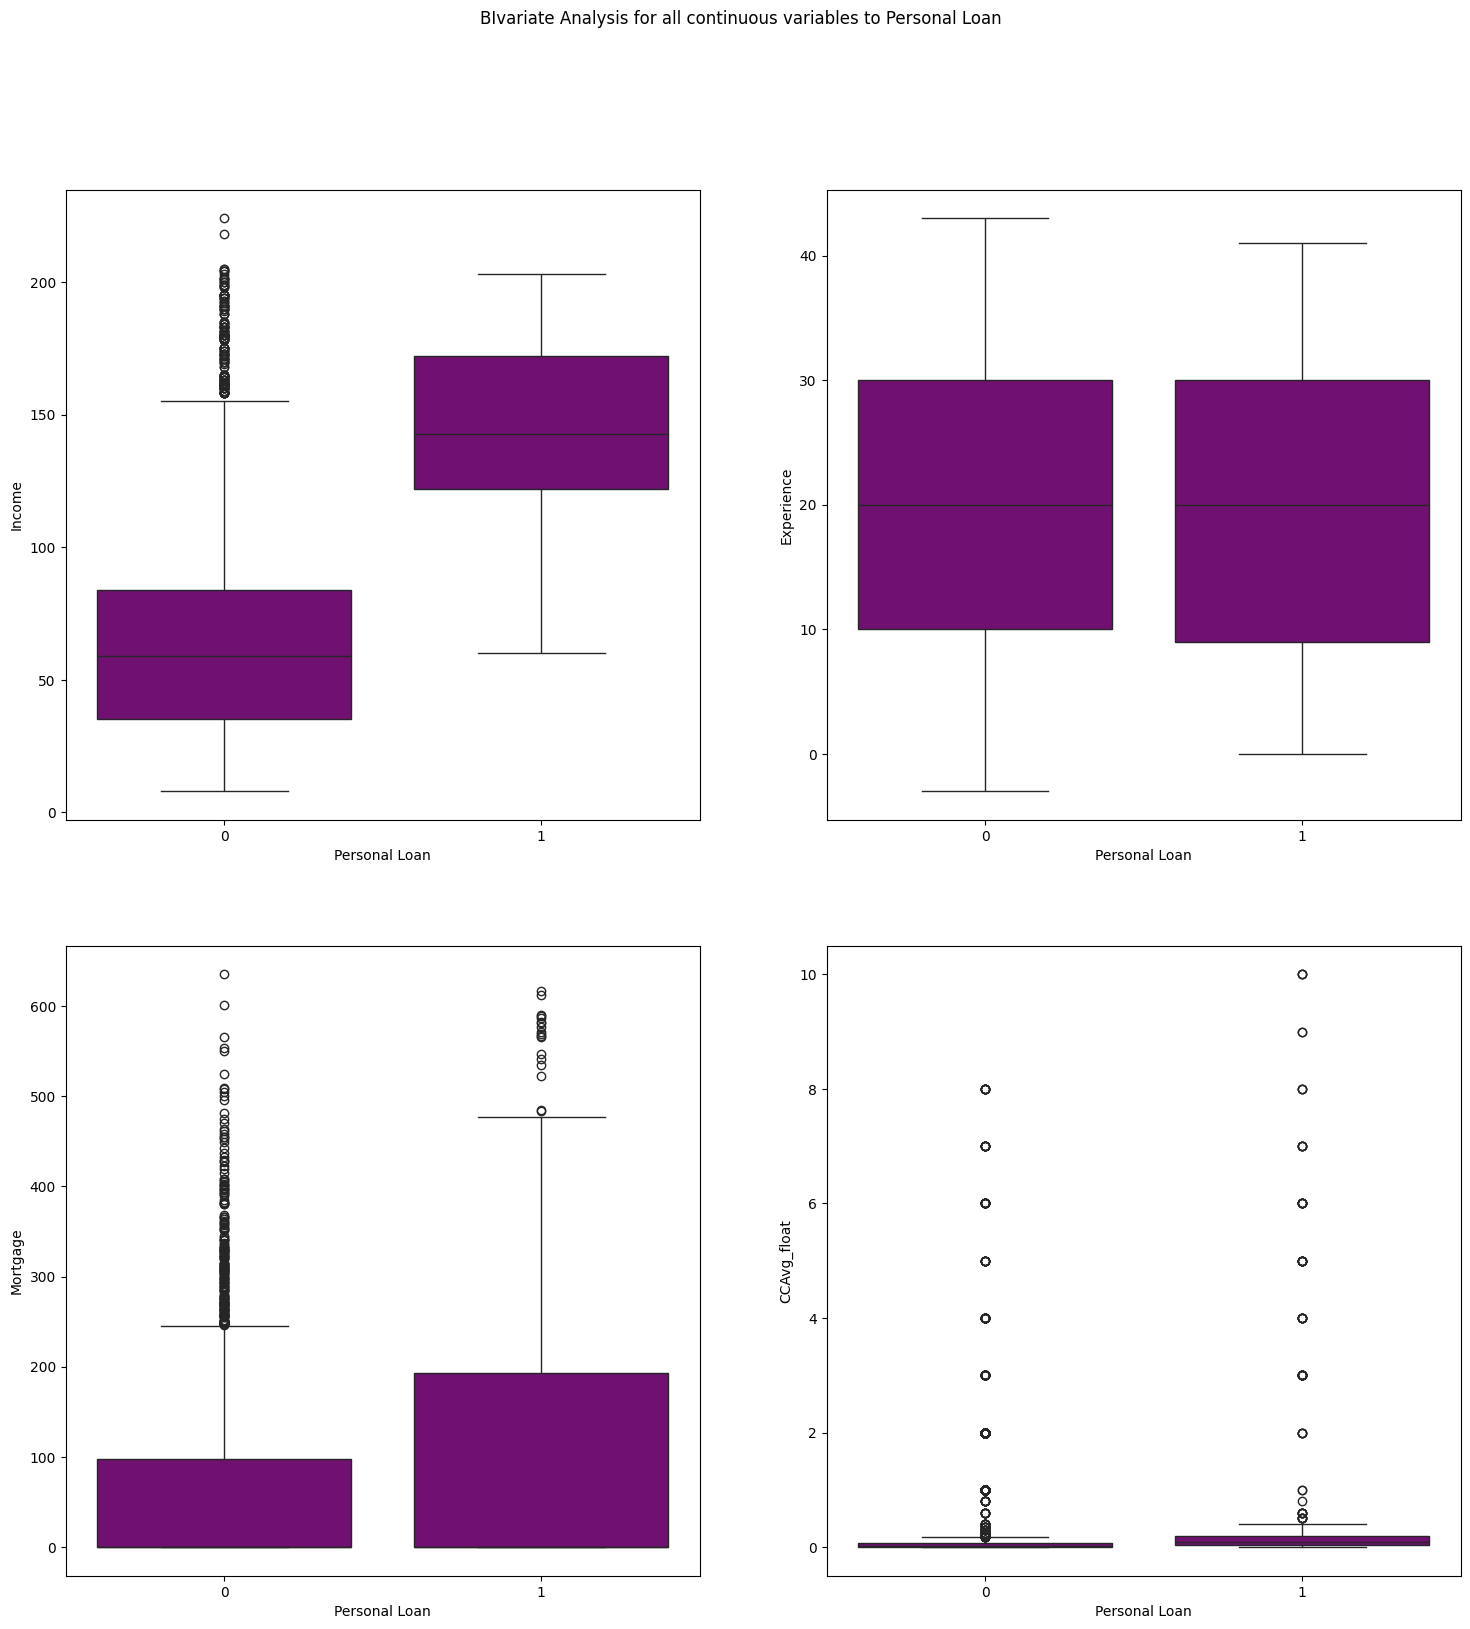

In [40]:
# Bi variate Analysis

fig, axes = plt.subplots(2, 2, figsize = (18, 18))
fig.suptitle('BIvariate Analysis for all continuous variables to Personal Loan')
sns.boxplot(ax = axes[0, 0], x = 'Personal Loan', y='Income', data = df2, color = 'purple');
sns.boxplot(ax = axes[0, 1], x = 'Personal Loan', y='Experience', data = df2, color = 'purple');
sns.boxplot(ax = axes[1, 0], x = 'Personal Loan', y='Mortgage', data = df2, color = 'purple');
sns.boxplot(ax = axes[1, 1], x = 'Personal Loan', y='CCAvg_float', data = df2, color = 'purple');



In [41]:
# We can see In income and Personal loan figure, the median of people taking personal loans
# have higher income than that of the people with lower income

"""The problem is the outliers. But it makes sense I mean in a practical sense, people with exceptionally higher income will tend to not take personal loan so it makes practical sense. I'll keep the outlier and check at the ennd like residual analysis."""

"The problem is the outliers. But it makes sense I mean in a practical sense, people with exceptionally higher income will tend to not take personal loan so it makes practical sense. I'll keep the outlier and check at the ennd like residual analysis."

In [42]:
# Let's learn some statistical insights from Income and Personal Loan
# My favourite test from R code: Welch t-test

"""
Null Hypothesis (H₀):
μ₁ = μ₂
There is no difference in average income between the two groups (people who took personal loan and who didn't).

Alternative Hypothesis (H₁):
μ₁ ≠ μ₂
There is a difference in average income between loan acceptors and non-acceptors."""

income_loan_yes = df2[df2['Personal Loan'] == 1]['Income']
income_loan_no = df2[df2['Personal Loan'] == 0]['Income']

t_stat, p_val = ttest_ind(income_loan_yes, income_loan_no, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4e}")

T-statistic: 50.2333, P-value: 1.3307e-227


In [43]:
""" The P-value being very small meaing there is a very strong and statistically significant difference between the average incomes of people who accepted vs 
people who did not accept the loan. """



' The P-value being very small meaing there is a very strong and statistically significant difference between the average incomes of people who accepted vs \npeople who did not accept the loan. '

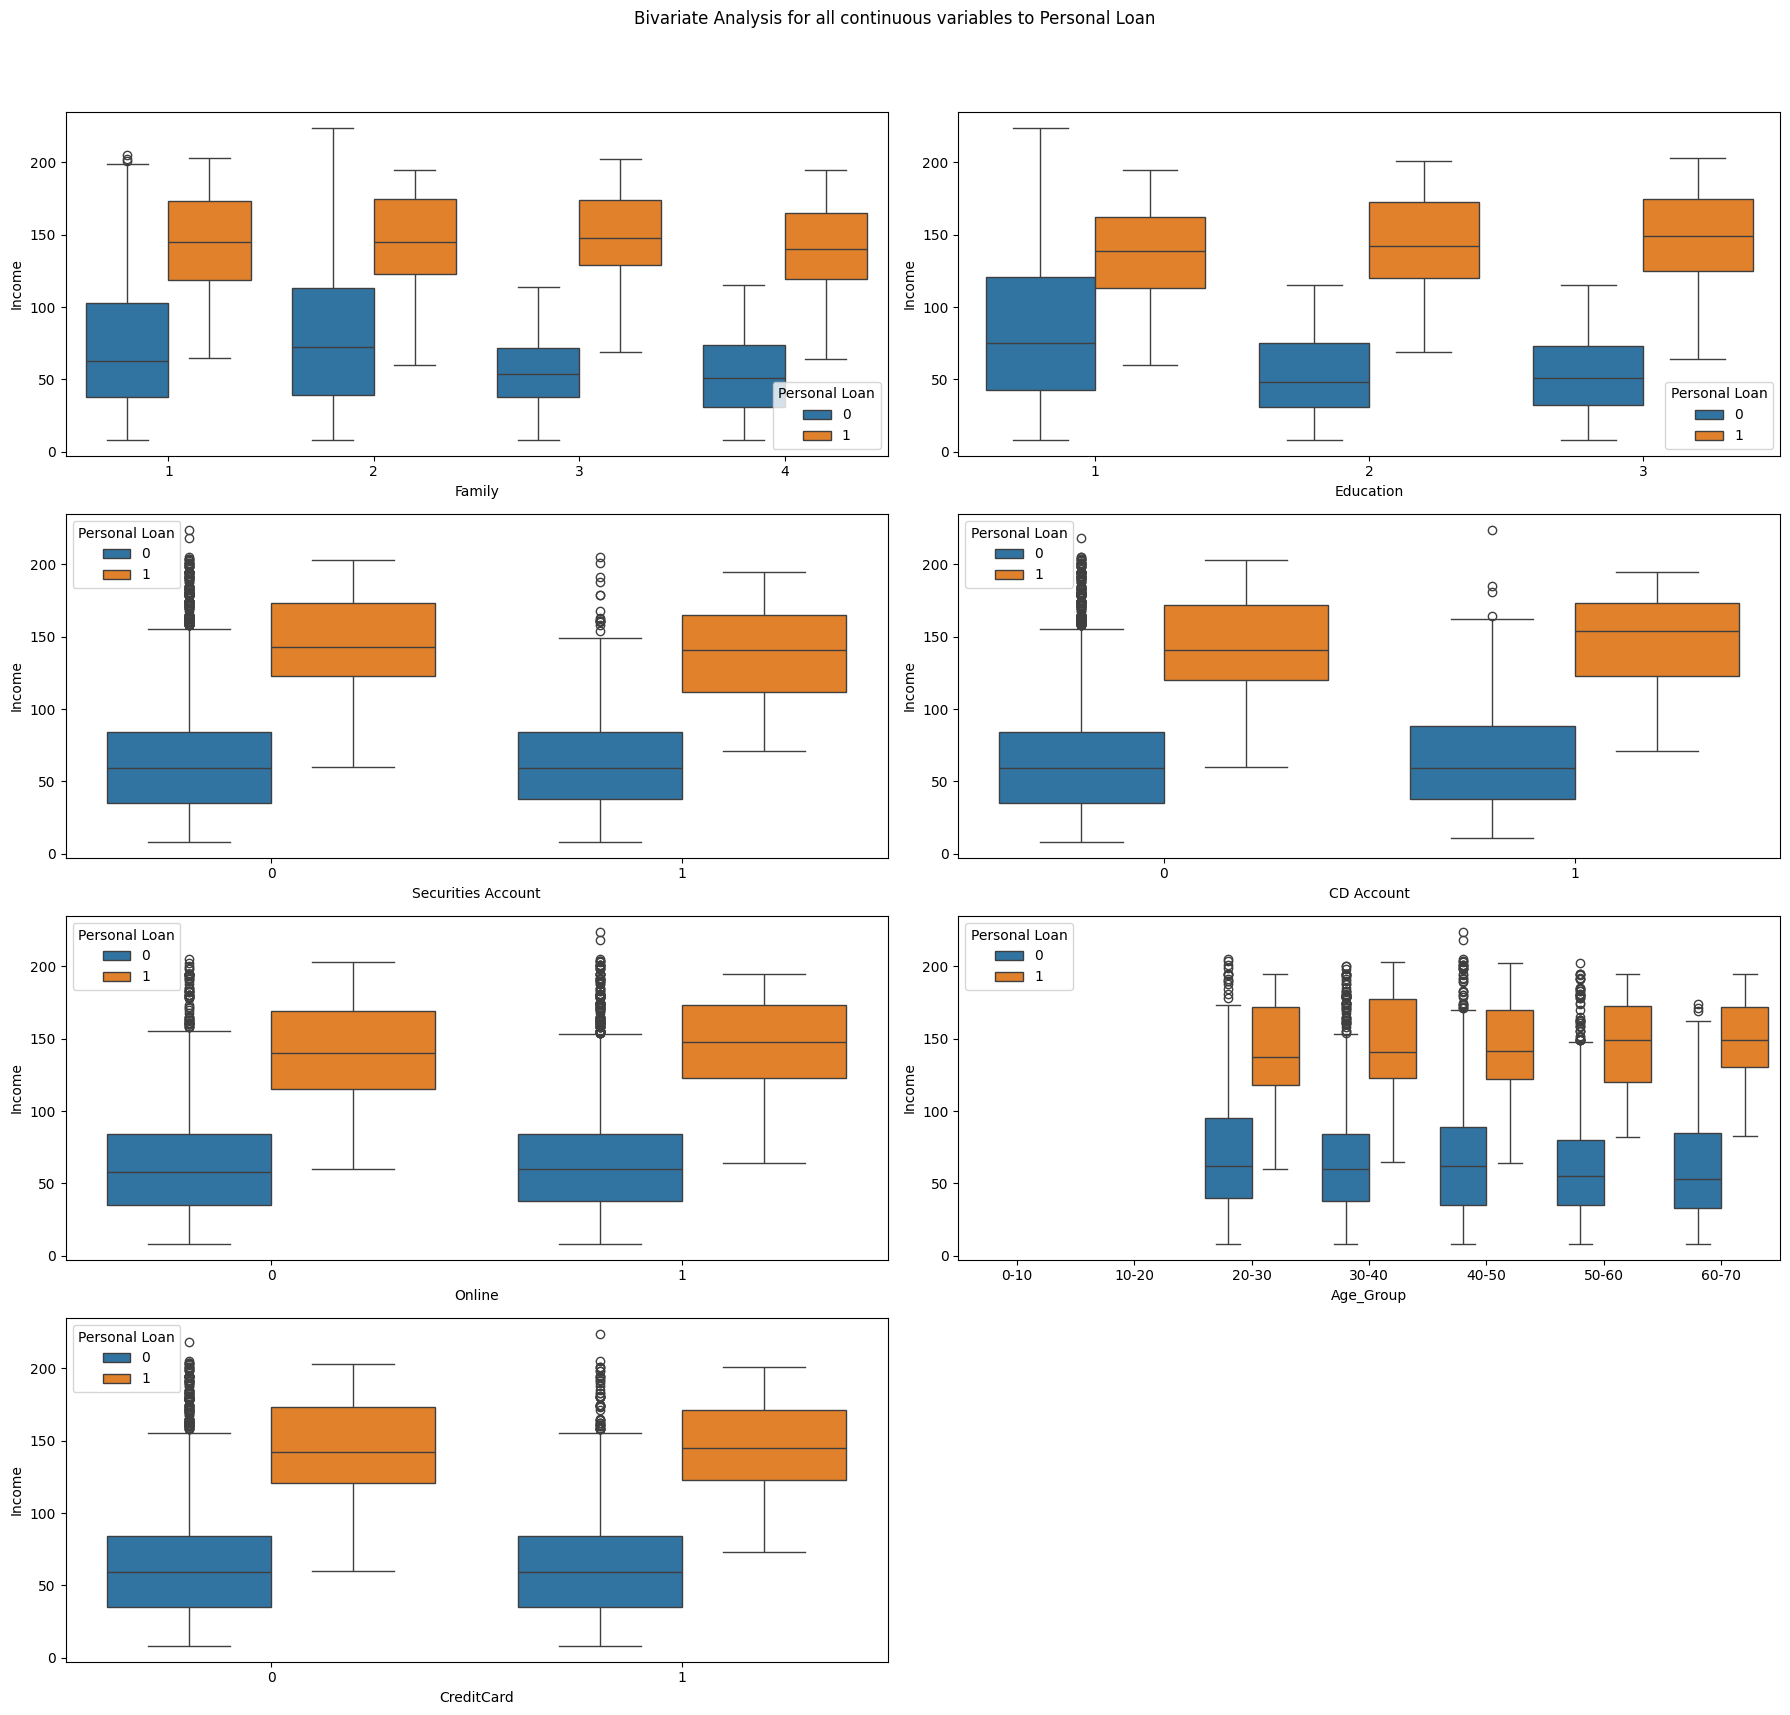

In [44]:
fig, axes = plt.subplots(4, 2, figsize=(18, 18))
fig.suptitle('Bivariate Analysis for all continuous variables to Personal Loan')

sns.boxplot(ax=axes[0, 0], data=df2, x="Family", y="Income", hue="Personal Loan")
sns.boxplot(ax=axes[0, 1], data=df2, x="Education", y="Income", hue="Personal Loan")
sns.boxplot(ax=axes[1, 0], data=df2, x="Securities Account", y="Income", hue="Personal Loan")
sns.boxplot(ax=axes[1, 1], data=df2, x="CD Account", y="Income", hue="Personal Loan")
sns.boxplot(ax=axes[2, 0], data=df2, x="Online", y="Income", hue="Personal Loan")
sns.boxplot(ax=axes[2, 1], data=df2, x="Age_Group", y="Income", hue="Personal Loan")
sns.boxplot(ax=axes[3, 0], data=df2, x="CreditCard", y="Income", hue="Personal Loan")

# Optionally hide the unused subplot
fig.delaxes(axes[3, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for title
plt.show()


In [45]:
"""We can see that people accept loans regardless of there other factors (categorical variables)
like Online Banking, CreditCard, and so on. But see that in all cases, people usually taking loan have
income higher than 100K and below 200K"""

'We can see that people accept loans regardless of there other factors (categorical variables)\nlike Online Banking, CreditCard, and so on. But see that in all cases, people usually taking loan have\nincome higher than 100K and below 200K'

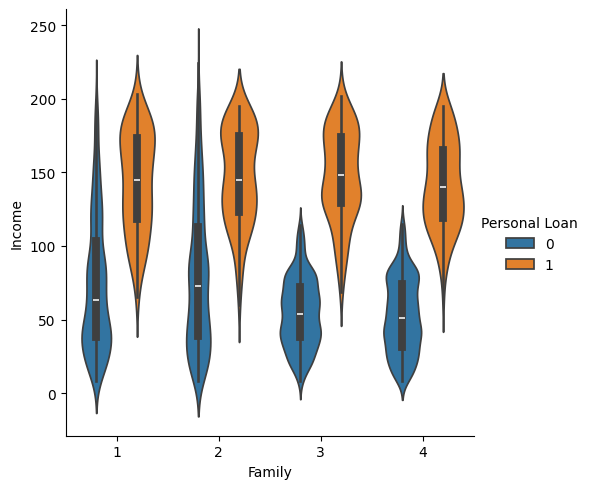

In [46]:
sns.catplot(
    data=df2, x="Family", y="Income", hue="Personal Loan", kind="violin",
)

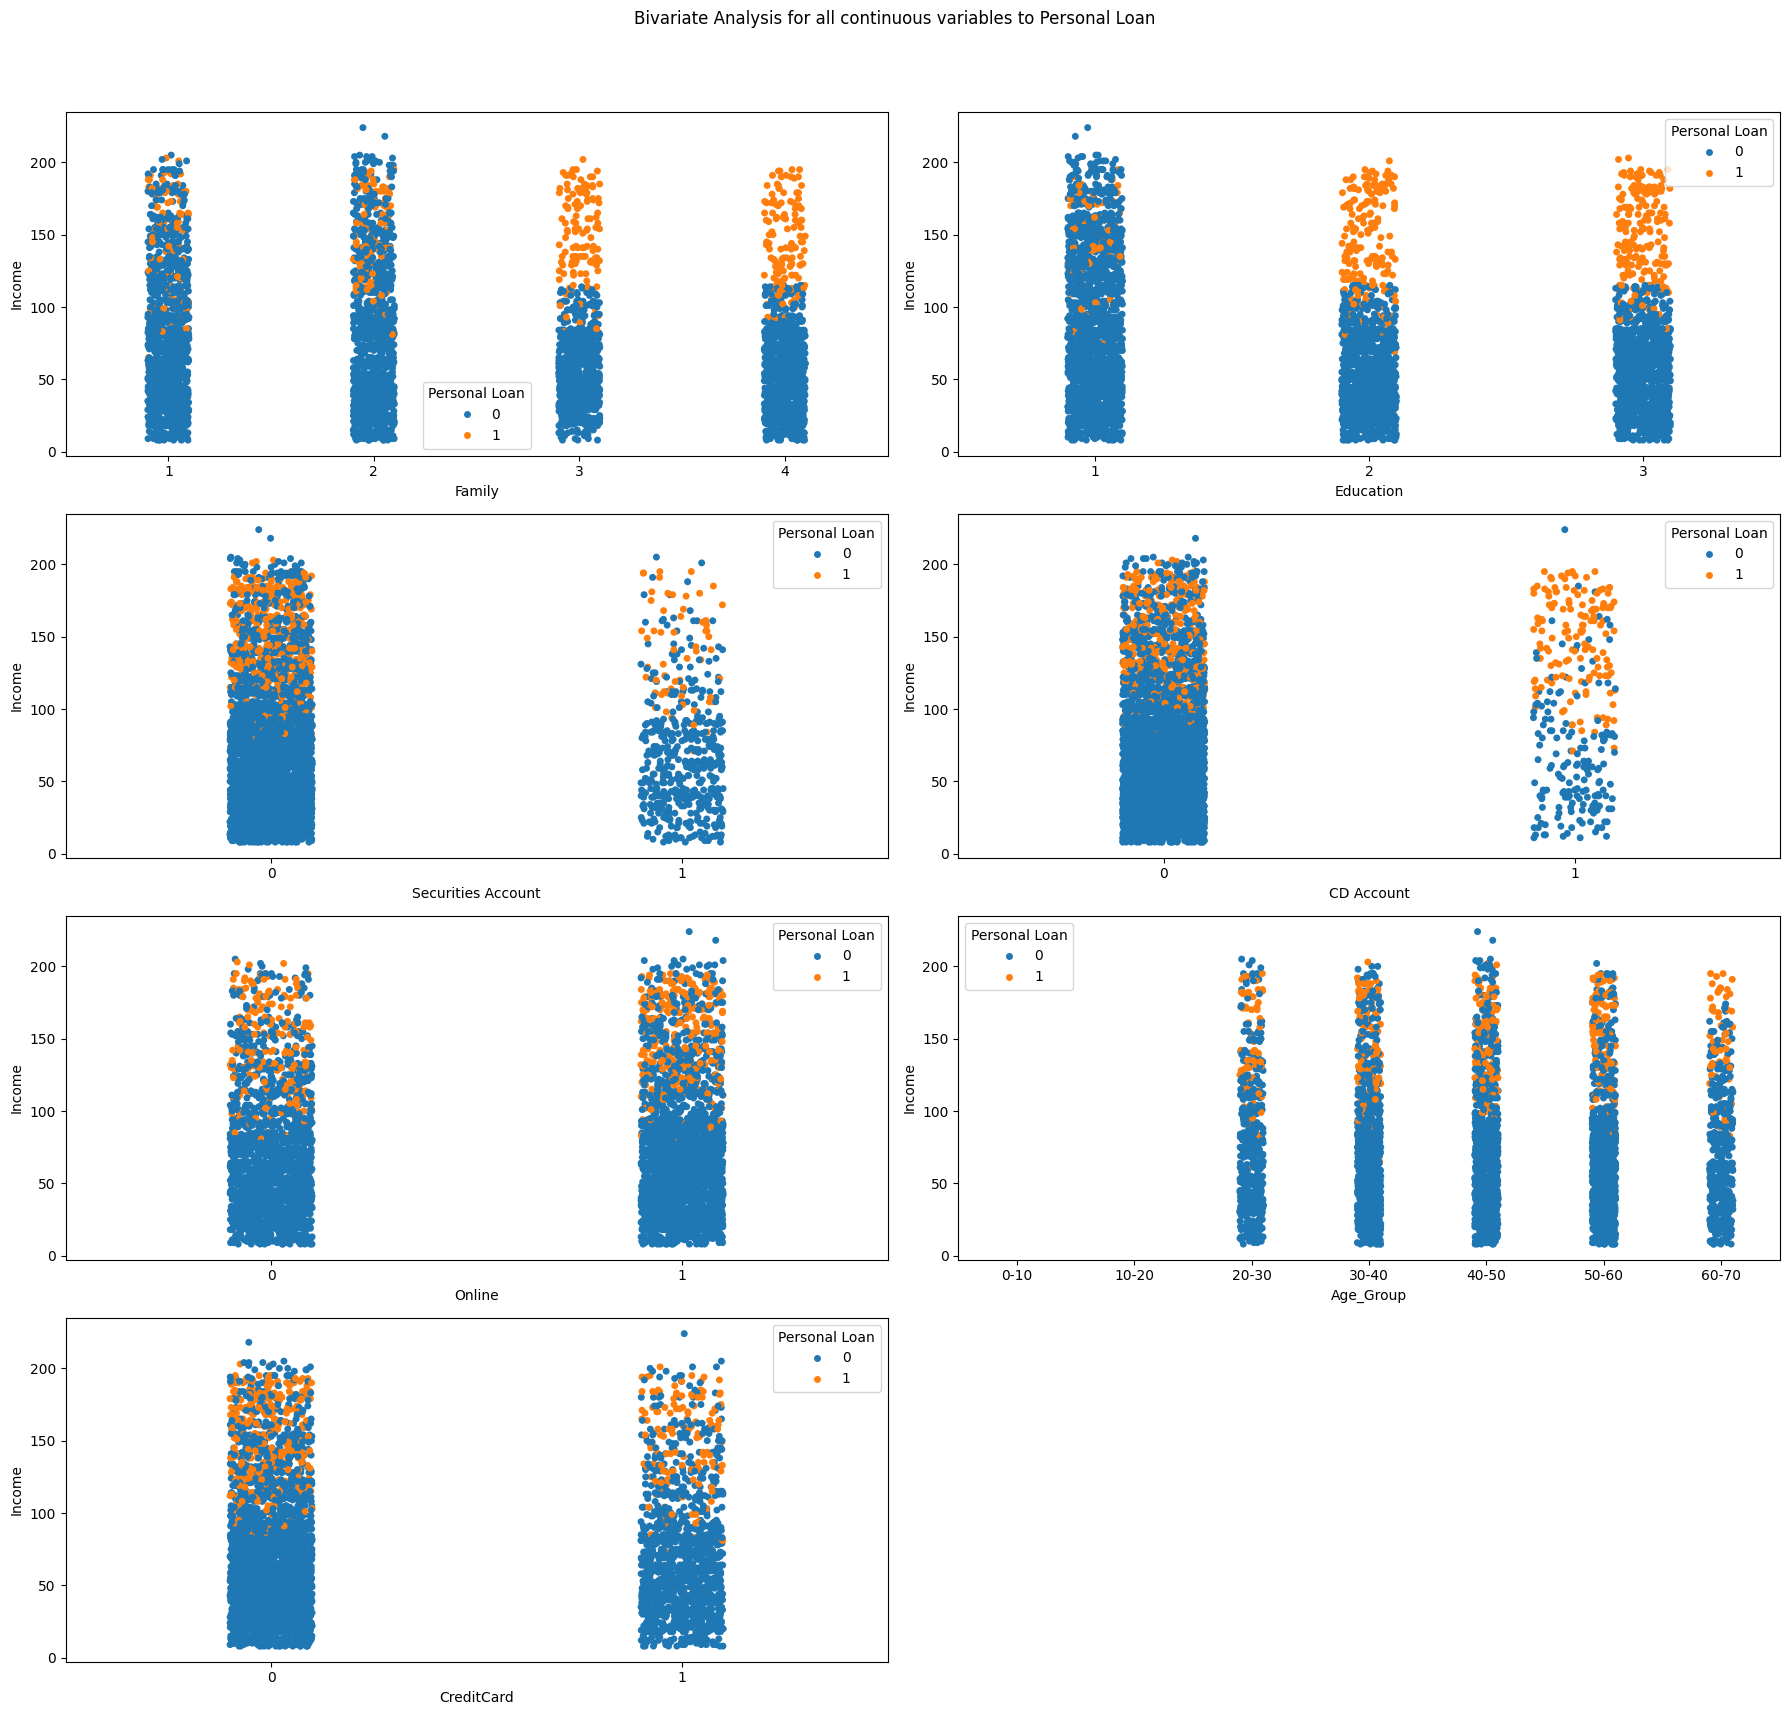

In [47]:
fig, axes = plt.subplots(4, 2, figsize=(18, 18))
fig.suptitle('Bivariate Analysis for all continuous variables to Personal Loan')

sns.stripplot(ax=axes[0, 0], data=df2, x="Family", y="Income", hue="Personal Loan")
sns.stripplot(ax=axes[0, 1], data=df2, x="Education", y="Income", hue="Personal Loan")
sns.stripplot(ax=axes[1, 0], data=df2, x="Securities Account", y="Income", hue="Personal Loan")
sns.stripplot(ax=axes[1, 1], data=df2, x="CD Account", y="Income", hue="Personal Loan")
sns.stripplot(ax=axes[2, 0], data=df2, x="Online", y="Income", hue="Personal Loan")
sns.stripplot(ax=axes[2, 1], data=df2, x="Age_Group", y="Income", hue="Personal Loan")
sns.stripplot(ax=axes[3, 0], data=df2, x="CreditCard", y="Income", hue="Personal Loan")

# Optionally hide the unused subplot
fig.delaxes(axes[3, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for title
plt.show()


In [48]:
""" Fo now, we dont see any relationship with the income, personal loan and all categorical variables"""


' Fo now, we dont see any relationship with the income, personal loan and all categorical variables'

In [49]:
# Chi-Square test
# We want to screen out weak categorical predictors,
# Or want to understand potential associations before encoding and feeding them into a model.

categorical_vars = ['Education', 'Family', 'Online', 'CreditCard', 'CD Account', 'Securities Account']

for var in categorical_vars:
    contingency_table = pd.crosstab(df2[var], df2['Personal Loan'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-square Test for {var} vs Personal Loan")
    print(f"Chi2 = {chi2:.4f}, p-value = {p:.4f}")


Chi-square Test for Education vs Personal Loan
Chi2 = 111.2399, p-value = 0.0000

Chi-square Test for Family vs Personal Loan
Chi2 = 29.6761, p-value = 0.0000

Chi-square Test for Online vs Personal Loan
Chi2 = 0.1560, p-value = 0.6929

Chi-square Test for CreditCard vs Personal Loan
Chi2 = 0.0211, p-value = 0.8844

Chi-square Test for CD Account vs Personal Loan
Chi2 = 495.9042, p-value = 0.0000

Chi-square Test for Securities Account vs Personal Loan
Chi2 = 2.1723, p-value = 0.1405


In [50]:
""" We can see that there is some association between 
Personal loan and [Education, Family, CD Account]"""

' We can see that there is some association between \nPersonal loan and [Education, Family, CD Account]'

In [51]:
# Preparing Data
# Label Encoding Family and Education

X = df2[['Income', 'Education', 'Family', 'CD Account']]  # Choose good predictors
y = df2['Personal Loan']

# Converts categorical variables if needed (e.g., Education, Family)
X = pd.get_dummies(X, drop_first=True)

# split the data set into train and test  models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [52]:
# Converting all True/False values to 0 and 1
X_train = X_train.astype(int)
X_test = X_test.astype(int)


In [53]:
X_train.head()

,Income,Education_2,Education_3,Family_2,Family_3,Family_4,CD Account_1
1840,23,0,1,0,0,1,0
2115,30,0,0,0,1,0,0
4437,63,0,0,1,0,0,0
1146,71,0,0,0,0,0,0
2486,130,0,0,0,0,0,0


In [54]:
X_test.head()

,Income,Education_2,Education_3,Family_2,Family_3,Family_4,CD Account_1
1501,35,1,0,1,0,0,0
2586,149,0,0,0,0,1,0
2653,121,0,0,1,0,0,0
1055,62,0,0,0,0,0,0
705,30,1,0,0,1,0,0


In [55]:
y_train.head(5)

1840    0
2115    0
4437    0
1146    0
2486    0
Name: Personal Loan, dtype: category
Categories (2, int64): [0, 1]

In [56]:
# Standarizing the scales of all the variables 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Logistic  Regression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [58]:
# Random Forest Classifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
#XG Boosting classification

xgb_model = XGBClassifier(
    eval_metric='logloss', 
    learning_rate=0.1, 
    n_estimators=100,
    random_state=42
)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [60]:
#So far our 3 models are ready, We'll do some Model evaluation now to see how good each models are

In [61]:
# For Logistic Regression
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate metrics
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")

Confusion Matrix:
 [[1333   10]
 [  47  110]]
Accuracy:  0.962
Precision: 0.917
Recall:    0.701


In [62]:
'''Accuracy = 96.2%

overall, the model is highly correct.

but in imbalanced datasets (way more “no” than “yes”), accuracy can be misleading.

Precision = 91.7%

when the model says “this person will take the loan,” it’s right 92% of the time.

great news: marketing resources are not wasted too often.

Recall = 70.1%

of all customers who actually took the loan, the model only found ~70%.

meaning ~30% of true loan takers are being missed.'''

'Accuracy = 96.2%\n\noverall, the model is highly correct.\n\nbut in imbalanced datasets (way more “no” than “yes”), accuracy can be misleading.\n\nPrecision = 91.7%\n\nwhen the model says “this person will take the loan,” it’s right 92% of the time.\n\ngreat news: marketing resources are not wasted too often.\n\nRecall = 70.1%\n\nof all customers who actually took the loan, the model only found ~70%.\n\nmeaning ~30% of true loan takers are being missed.'

In [63]:
# We want higher Recall because the cost of losing true positive is higher, In short, it's better to catch some false targets than to miss some people who would've taken the loan.

In [64]:
# For Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate metrics
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")

Confusion Matrix:
 [[1330   13]
 [  22  135]]
Accuracy:  0.977
Precision: 0.912
Recall:    0.860


In [65]:
'''Accuracy = 97.7%

even higher than logistic regression (96.2%).

Precision = 91.2%

when the model says “yes,” it’s correct about 91% of the time → nearly the same as logistic regression.

Recall = 86.0%

of all true loan takers, the model identifies 86%.

much better than logistic regression’s 70%.'''

'Accuracy = 97.7%\n\neven higher than logistic regression (96.2%).\n\nPrecision = 91.2%\n\nwhen the model says “yes,” it’s correct about 91% of the time → nearly the same as logistic regression.\n\nRecall = 86.0%\n\nof all true loan takers, the model identifies 86%.\n\nmuch better than logistic regression’s 70%.'

In [66]:
# For XGB Classifier
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate metrics
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")

Confusion Matrix:
 [[1331   12]
 [  22  135]]
Accuracy:  0.977
Precision: 0.918
Recall:    0.860


In [67]:
'''Accuracy = 97.7%

even higher than logistic regression (96.2%).

Precision = 91.8%

when the model says “yes,” it’s correct about 91% of the time → nearly the same as logistic regression.

Recall = 86.0%

of all true loan takers, the model identifies 86%.

much better than logistic regression’s 70%.'''

'Accuracy = 97.7%\n\neven higher than logistic regression (96.2%).\n\nPrecision = 91.8%\n\nwhen the model says “yes,” it’s correct about 91% of the time → nearly the same as logistic regression.\n\nRecall = 86.0%\n\nof all true loan takers, the model identifies 86%.\n\nmuch better than logistic regression’s 70%.'

In [68]:
# Model Interpretation

In [69]:
# Logistic regression model interpretation

# Rename once and keep consistent (no space)
df_for_logit = df.rename(columns={
    "Personal Loan": "PersonalLoan",
    "CD Account": "CD_Account"
})


# Similar to R code: glm(...)

result = smf.logit("PersonalLoan ~ Income + C(Education) + C(Family) + C(CD_Account)", data=df_for_logit).fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.119035
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           PersonalLoan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4992
Method:                           MLE   Df Model:                            7
Date:                Wed, 24 Sep 2025   Pseudo R-squ.:                  0.6236
Time:                        16:58:28   Log-Likelihood:                -595.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -13.1555      0.541    -24.316      0.000     -14.216     -12.095
C(Edu

In [70]:
# All these parameters of coefficients are in log scale, we need to put it in odd-ratio 
params = result.params # data frame of each coefficient Beta values
conf = result.conf_int() # data frame of each confidence intervals
odd_ratio = np.exp(params)
conf['OR_lower'] = np.exp(conf[0])
conf['OR_upper'] = np.exp(conf[1])
odds_table = pd.DataFrame({
    "OddsRatio": odd_ratio,
    "CI_lower": conf['OR_lower'],
    "CI_upper": conf['OR_upper'],
    "p_value": result.pvalues
})

print (odds_table)

                    OddsRatio      CI_lower   CI_upper        p_value
Intercept            0.000002  6.700818e-07   0.000006  1.339947e-130
C(Education)[T.2]   44.869407  2.669740e+01  75.410462   9.310477e-47
C(Education)[T.3]   49.936304  3.002990e+01  83.038382   2.475800e-51
C(Family)[T.2]       0.869277  5.586283e-01   1.352675   5.346213e-01
C(Family)[T.3]       7.413785  4.585926e+00  11.985410   2.977961e-16
C(Family)[T.4]       4.989965  3.158989e+00   7.882189   5.531832e-12
C(CD_Account)[T.1]  12.844875  7.937710e+00  20.785694   2.592559e-25
Income               1.069619  1.063468e+00   1.075805  8.663439e-116


In [71]:
'''
Education

Graduate (Edu=2): ~45× more likely than Undergraduates to accept.
(95% CI: 27× – 75×, p < 0.001 → highly significant)

Advanced (Edu=3): ~50× more likely than Undergraduates.
(95% CI: 30× – 83×, p < 0.001)
Business take: Higher education levels = huge willingness to accept. Bank could design targeted offers for professionals with graduate/advanced education.

Family size

Family=3: ~7.4× more likely than Family=1 (single person).
(CI: 4.6× – 12×, p < 0.001)

Family=4: ~5× more likely than singles.
(CI: 3.2× – 7.9×, p < 0.001)

Family=2: ~0.87 (CI includes 1, p=0.53 → not significant).
Business take: Families with 3–4 members are much more receptive (loans for education, home, medical). Families of 2 don’t differ much from singles.

CD Account

Having a CD account: ~13× more likely to accept vs no CD.
(CI: 8× – 21×, p < 0.001)
Business take: Strong sign of existing trust/relationship. CD holders are low-hanging fruit for cross-selling personal loans.

Income

OR = 1.07 → Each +$1,000 raises odds by ~7%.

So +$10k ≈ 2× the odds.
(CI very tight: 1.06–1.08, p < 0.001)
Business take: Higher income consistently predicts acceptance. Target higher-income brackets with tailored offers.

Target: Educated professionals, families with 3–4 members, CD account holders, higher income customers.

Avoid wasting effort on: singles with no CD account + low income + undergrad (baseline odds are tiny).

Income effect is steady and scalable; Education/CD/Family are strong segmentation levers.'''

'\nEducation\n\nGraduate (Edu=2): ~45× more likely than Undergraduates to accept.\n(95% CI: 27× – 75×, p < 0.001 → highly significant)\n\nAdvanced (Edu=3): ~50× more likely than Undergraduates.\n(95% CI: 30× – 83×, p < 0.001)\nBusiness take: Higher education levels = huge willingness to accept. Bank could design targeted offers for professionals with graduate/advanced education.\n\nFamily size\n\nFamily=3: ~7.4× more likely than Family=1 (single person).\n(CI: 4.6× – 12×, p < 0.001)\n\nFamily=4: ~5× more likely than singles.\n(CI: 3.2× – 7.9×, p < 0.001)\n\nFamily=2: ~0.87 (CI includes 1, p=0.53 → not significant).\nBusiness take: Families with 3–4 members are much more receptive (loans for education, home, medical). Families of 2 don’t differ much from singles.\n\nCD Account\n\nHaving a CD account: ~13× more likely to accept vs no CD.\n(CI: 8× – 21×, p < 0.001)\nBusiness take: Strong sign of existing trust/relationship. CD holders are low-hanging fruit for cross-selling personal loans

In [72]:
#Feature importance of Random Forest model

#Calculating the Gini Importance and mean decrease in accuraccy
# this method measures how much the impurity (or randomness) 
# within a node of a decision tree decreases when a specific feature is used to split the data.

importances = rf_model.feature_importances_
feature_imp_df = pd.DataFrame ({
    'Feature': X_train.columns, 
    'Gini Importance': importances
}).sort_values('Gini Importance', ascending = False)
print (feature_imp_df)

        Feature  Gini Importance
0        Income         0.607350
2   Education_3         0.102353
1   Education_2         0.102018
5      Family_4         0.065898
6  CD Account_1         0.063907
4      Family_3         0.047207
3      Family_2         0.011267


In [73]:
'''
Income (0.607) → by far the most important factor. Customers with higher income are much more likely to accept a personal loan.

Education_3 (0.102) → customers with an advanced/professional degree (compared to the baseline undergraduate group) are strongly influential.

Education_2 (0.102) → graduate education also adds predictive power, though slightly less than advanced.

Family_4 (0.066) and CD Account_1 (0.064) → both have moderate importance. Having a CD account, or being from a family of 4, helps distinguish loan acceptors.

Family_3 (0.047) → some influence, but weaker.

Family_2 (0.011) → very little contribution, almost negligible.
'''


'\nIncome (0.607) → by far the most important factor. Customers with higher income are much more likely to accept a personal loan.\n\nEducation_3 (0.102) → customers with an advanced/professional degree (compared to the baseline undergraduate group) are strongly influential.\n\nEducation_2 (0.102) → graduate education also adds predictive power, though slightly less than advanced.\n\nFamily_4 (0.066) and CD Account_1 (0.064) → both have moderate importance. Having a CD account, or being from a family of 4, helps distinguish loan acceptors.\n\nFamily_3 (0.047) → some influence, but weaker.\n\nFamily_2 (0.011) → very little contribution, almost negligible.\n'

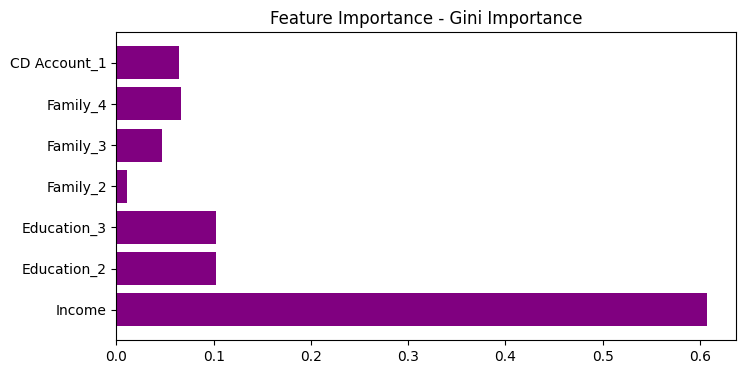

In [74]:
# In graphical visualization
plt.figure(figsize=(8,4))
plt.barh(X_train.columns, importances, color='purple')
plt.title('Feature Importance - Gini Importance')
plt.show()

In [75]:
# To define if feature with least influence on the model are useful or just noise
# We conduct Permutation test

imp = []
initial_accuracy = accuracy_score(y_test, rf_model.predict(X_test))  # baseline

for i, col in enumerate(X_test.columns):
    Xp = X_test.copy()                                # New copy in each iteration
    Xp[col] = np.random.permutation(Xp[col].values)   # shuffle just this column
    shuff_accuracy = accuracy_score(y_test, rf_model.predict(Xp))
    imp.append(initial_accuracy - shuff_accuracy)

accuracy_df = (pd.DataFrame({
    'Feature': X_test.columns,
    'Decrease in Accuracy': imp
}).sort_values('Decrease in Accuracy', ascending=False))

print(accuracy_df)

                            


        Feature  Decrease in Accuracy
0        Income              0.200000
2   Education_3              0.050000
1   Education_2              0.036000
5      Family_4              0.030000
4      Family_3              0.024667
6  CD Account_1              0.001333
3      Family_2             -0.002000


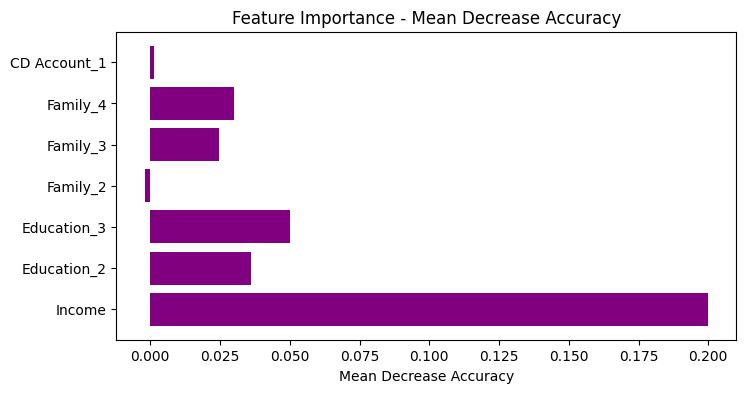

In [76]:
# In graphical visualization
plt.figure(figsize=(8,4))
plt.barh(X_train.columns, imp, color='purple')
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()

In [77]:
'''
Income: when you shuffle it, accuracy drops a lot → the model strongly relies on income to separate “loan yes” vs “loan no.”

Education_3 / Education_2, Family_4, Family_3: moderate influence → these features do help the model.

Family_2 and CD Account: when shuffled, accuracy barely changes → the model doesn’t really depend on them for prediction.
'''

'\nIncome: when you shuffle it, accuracy drops a lot → the model strongly relies on income to separate “loan yes” vs “loan no.”\n\nEducation_3 / Education_2, Family_4, Family_3: moderate influence → these features do help the model.\n\nFamily_2 and CD Account: when shuffled, accuracy barely changes → the model doesn’t really depend on them for prediction.\n'

In [78]:
'''
Family of 2: The model can’t distinguish loan takers vs non-takers based on “Family=2.” 
In other words, in the dataset, this group looks very similar across the target variable. 
So, the model gains almost nothing by splitting on it.

CD Account: Similarly, whether someone has a CD account or not doesn’t strongly separate 
loan takers from non-takers in your data. The model already finds better signals elsewhere 
(like Income).
'''

'\nFamily of 2: The model can’t distinguish loan takers vs non-takers based on “Family=2.” \nIn other words, in the dataset, this group looks very similar across the target variable. \nSo, the model gains almost nothing by splitting on it.\n\nCD Account: Similarly, whether someone has a CD account or not doesn’t strongly separate \nloan takers from non-takers in your data. The model already finds better signals elsewhere \n(like Income).\n'

In [79]:
# SHAP testing for XGBoosting
exp = shap.Explainer(xgb_model)
shap_val = exp(X_test)
shap.initjs()

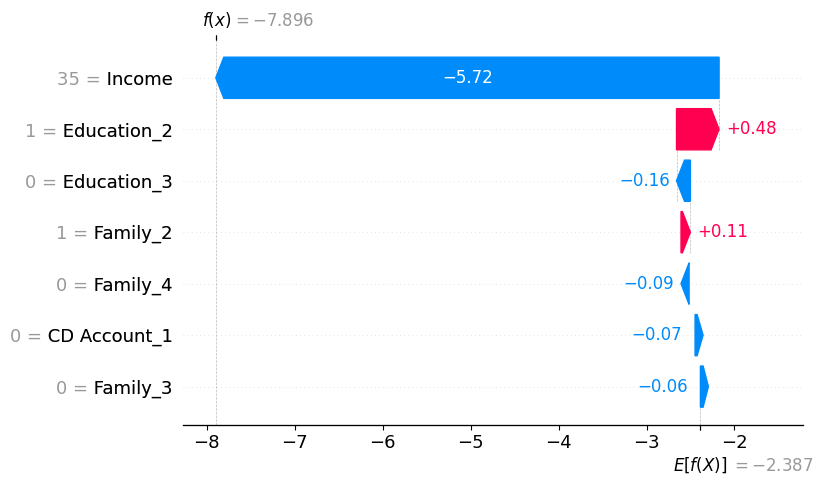

In [80]:
shap.waterfall_plot(shap_val[0])

In [ ]:
''' 
Here we see that the Shap tool plotted waterfall model for first row of X_test.
The Base prediction was -2.387 in log-odd scale and all the feature influenced
towards the final prediction. The income had vastly influenced on the prediction for the first row

This plot will be different for different preditions (rows)
'''


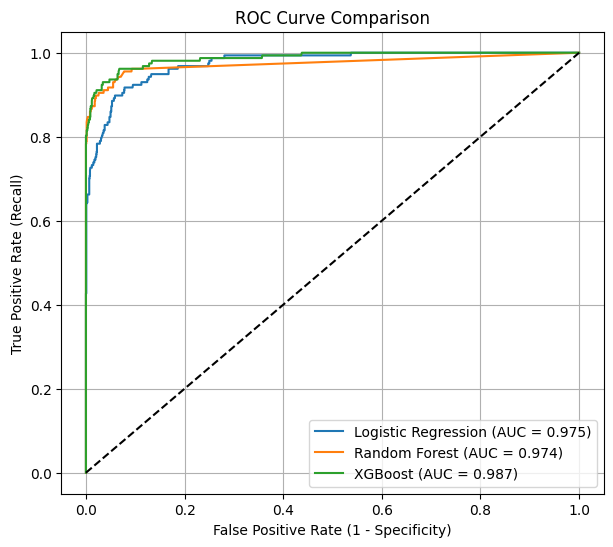

In [81]:
#ROC - AUC Curve

# Predicted probabilities (for positive class = 1)
y_proba_log = log_model.predict_proba(X_test_scaled)[:,1]
y_proba_rf  = rf_model.predict_proba(X_test)[:,1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

# calculate ROC curve points
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# calculate AUC
auc_log = roc_auc_score(y_test, y_proba_log)
auc_rf  = roc_auc_score(y_test, y_proba_rf)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# plot ROC curves
plt.figure(figsize=(7,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})')
plt.plot(fpr_rf,  tpr_rf,  label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})')

# random guess line
plt.plot([0,1],[0,1],'k--')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
'''
ROC curve:
shows how good each model is at distinguishing between “loan acceptors” (1) and “non-acceptors” (0),
across all thresholds.

AUC (area under curve):
single number that summarizes the model’s ability to rank correctly. closer to 1.0 = excellent model,
0.5 = random guessing.

All three are very strong (above 0.97).
XGBoost edges out slightly — meaning it ranks “yes” customers above “no” customers a little better.